In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# NLP and EDA on Content

In [24]:
content_df = pd.read_csv('formatted_df.csv')
content_df

,title,url,desc,genre
0,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,Veteran journalist Joe Nocera’s neighbor...,"['Business', 'Society & Culture']"
1,The Chernobyl Podcast,https://chartable.com/podcasts/the-chernobyl-p...,The official podcast of the miniseries Chernob...,"['Society & Culture', 'History', 'TV & Film']"
2,The Joe Rogan Experience,https://chartable.com/podcasts/the-joe-rogan-e...,Conduit to the Gaian Mind,"['Comedy', 'Society & Culture', 'Technology', ..."
3,Life Will Be the Death of Me with Chelsea Handler,https://chartable.com/podcasts/life-will-be-th...,"Starting May 23rd, 2019: Listen to Chelsea Han...","['Comedy', 'Society & Culture']"
4,Gangster Capitalism,https://chartable.com/podcasts/gangster-capita...,There’s a dark side to the American dream. Fro...,['Society & Culture']
5,Conan O’Brien Needs A Friend,https://chartable.com/podcasts/conan-obrien-ne...,"After 25 years at the Late Night desk, C...",['Comedy']
6,The Queen,https://chartable.com/podcasts/the-queen,"Linda Taylor was a con artist, a kidnapper, ma...","['Society & Culture', 'History']"
7,White Lies,https://chartable.com/podcasts/white-lies,"In 1965, Rev. James Reeb was murdered in Selma...","['News & Politics', 'Society & Culture', 'Hist..."
8,The Daily,https://chartable.com/podcasts/the-daily,This is what the news should sound like....,['News & Politics']
9,The Ron Burgundy Podcast,https://chartable.com/podcasts/the-ron-burgund...,Will Ferrell reprises his role as Ron Burgundy...,"['Comedy', 'Society & Culture', 'TV & Film']"


In [3]:
content_dict = content_df.to_dict('records')
content_dict[13]

{'title': 'Armchair Expert with Dax Shepard',
 'url': 'https://chartable.com/podcasts/armchair-expert-with-dax-shepard',
 'desc': 'Hi, I’m Dax Shepard, and I love talking to people. I am endlessly fascinated by the messiness of being human, and I find people who are vulnerable and honest about their struggles and shortcomings to be incredibly sexy. I invite you to join me as I explore other people’s stories. We will celebrate, above all, the challenges and setbacks that ultimately lead to growth and betterment. What qualifies me for such an endeavor? More than a decade of sobriety, a degree in Anthropology and four years of improv training. I will attempt to discover human “truths” without any laboratory work, clinical...',
 'genre': "['Comedy', 'Music', 'TV & Film']"}

In [4]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.summarization import summarize, keywords

In [5]:
# take the stop words out of 'token_test'
my_stopwords = set(stopwords.words('english'))

for i in content_dict:
    tokenized = word_tokenize(i['desc'])
    tokenized_list = []
    for j in tokenized:
        if j not in my_stopwords:
            tokenized_list.append(j)
    i.update({'tokenized': tokenized_list})


In [6]:
# lemmatize each word
lemma = WordNetLemmatizer()
for i in content_dict:
    lemmatized_list = []
    for j in i['tokenized']:
        lemmatized = lemma.lemmatize(j)
        lemmatized_list.append(lemmatized)
    i.update({'lemmatized': lemmatized_list})
  

In [7]:
# Convert a collection of text documents to a matrix of token counts
for i in content_dict:
    cv = CountVectorizer()
    cv.fit(i['lemmatized'])
    i.update({'vectorized': cv.get_feature_names()})

In [8]:
# convert each desc into a corpus of sentences
for i in content_dict:
    desc_corpus = []
    sentence = i['desc'].split('.')
    desc_corpus.extend(sentence)
    i.update({'desc_corpus': desc_corpus})

# perform Term Frequency - Inverse Document Frequency
for i in content_dict:
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf.fit_transform(i['desc_corpus'])
    i.update({'tf-idf': tfidf.get_feature_names()})

In [9]:
# gensim implementation of word2vec
for i in content_dict:
    keyword = keywords(i['desc'])
    i.update({'word2vec_keyword': keyword})

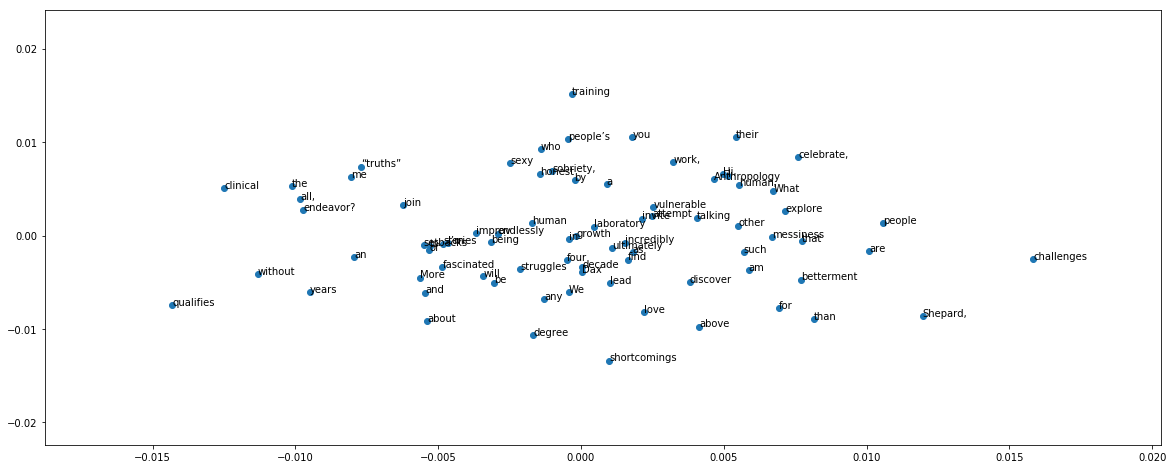

In [10]:
# visualization of a 2-dimensional PCA model of the word vectors for 'Armchair Expert with Dax Shepard' as example
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

sentences = content_dict[13]['desc'].split('.')
words = []
for i in sentences:
    word = i.split()
    words.append(word)
words
# train model
model = Word2Vec(words, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.figure(figsize=(20,8))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
# Scatter Plot of PCA Projection of Word2Vec Model

In [11]:
# visualization of tf-idf matrix for 'Armchair Expert with Dax Shepard' as example
# take out stop words
tfidf = TfidfVectorizer(stop_words='english')
# fit transform the sentences
tfidf_sentences = tfidf.fit_transform(content_dict[13]['desc_corpus'])
# visualize it
tfidf_df = pd.DataFrame(tfidf_sentences.toarray(), columns=tfidf.get_feature_names())
tfidf_df

,anthropology,attempt,betterment,celebrate,challenges,clinical,dax,decade,degree,discover,...,sobriety,stories,struggles,talking,training,truths,ultimately,vulnerable,work,years
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424886,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.424886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.312307,0.000000,0.000000,0.000000,0.000000,0.312307,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.46936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.377964,0.377964,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000
4,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,...,0.333333,0.00000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333
5,0.000000,0.385949,0.000000,0.000000,0.000000,0.385949,0.000000,0.000000,0.000000,0.385949,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.385949,0.000000,0.000000,0.385949,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
content_df = pd.DataFrame(content_dict)
content_df

,desc,desc_corpus,genre,lemmatized,tf-idf,title,tokenized,url,vectorized,word2vec_keyword
0,Veteran journalist Joe Nocera’s neighbor...,[ Veteran journalist Joe Nocera’s neighbo...,"['Business', 'Society & Culture']","[Veteran, journalist, Joe, Nocera, ’, neighbor...","[bloomberg, celebrities, company, control, cou...",The Shrink Next Door,"[Veteran, journalist, Joe, Nocera, ’, neighbor...",https://chartable.com/podcasts/the-shrink-next...,"[behind, bloomberg, but, celebrity, company, c...",joe\nike\nvacation\nstar
1,The official podcast of the miniseries Chernob...,[The official podcast of the miniseries Cherno...,"['Society & Culture', 'History', 'TV & Film']","[The, official, podcast, miniseries, Chernobyl...","[10, airs, atlantic, available, characters, ch...",The Chernobyl Podcast,"[The, official, podcast, miniseries, Chernobyl...",https://chartable.com/podcasts/the-chernobyl-p...,"[10, air, also, atlantic, available, character...",chernobyl\ncreator\ncraig\nproducer\nsky
2,Conduit to the Gaian Mind,[Conduit to the Gaian Mind],"['Comedy', 'Society & Culture', 'Technology', ...","[Conduit, Gaian, Mind]","[conduit, gaian, mind]",The Joe Rogan Experience,"[Conduit, Gaian, Mind]",https://chartable.com/podcasts/the-joe-rogan-e...,"[conduit, gaian, mind]",
3,"Starting May 23rd, 2019: Listen to Chelsea Han...","[Starting May 23rd, 2019: Listen to Chelsea Ha...","['Comedy', 'Society & Culture']","[Starting, May, 23rd, ,, 2019, :, Listen, Chel...","[2019, 23rd, britton, candid, celebrities, cha...",Life Will Be the Death of Me with Chelsea Handler,"[Starting, May, 23rd, ,, 2019, :, Listen, Chel...",https://chartable.com/podcasts/life-will-be-th...,"[2019, 23rd, be, britton, candid, celebrity, c...",featuring\nfeatures\nchanging\nfunny\nraw\nsmart
4,There’s a dark side to the American dream. Fro...,"[There’s a dark side to the American dream, F...",['Society & Culture'],"[There, ’, dark, side, American, dream, ., Fro...","[2019, admissions, american, andrew, award, br...",Gangster Capitalism,"[There, ’, dark, side, American, dream, ., Fro...",https://chartable.com/podcasts/gangster-capita...,"[2019, admission, american, andrew, around, aw...",scam\nadmissions\ncapitalism\ngangster\njenks\...
5,"After 25 years at the Late Night desk, C...","[ After 25 years at the Late Night desk, ...",['Comedy'],"[After, 25, year, Late, Night, desk, ,, Conan,...","[25, brien, celebrity, conan, deeper, desk, de...",Conan O’Brien Needs A Friend,"[After, 25, years, Late, Night, desk, ,, Conan...",https://chartable.com/podcasts/conan-obrien-ne...,"[25, after, along, brien, celebrity, conan, de...",conan\nunboundedly\nfriendship\nnight
6,"Linda Taylor was a con artist, a kidnapper, ma...","[Linda Taylor was a con artist, a kidnapper, m...","['Society & Culture', 'History']","[Linda, Taylor, con, artist, ,, kidnapper, ,, ...","[advantage, america, american, artist, citizen...",The Queen,"[Linda, Taylor, con, artist, ,, kidnapper, ,, ...",https://chartable.com/podcasts/the-queen,"[advantage, also, america, american, artist, b...",american\nwelfare\nronald\nreagan\ncitizens
7,"In 1965, Rev. James Reeb was murdered in Selma...","[In 1965, Rev, James Reeb was murdered in Sel...","['News & Politics', 'Society & Culture', 'Hist...","[In, 1965, ,, Rev, ., James, Reeb, murdered, S...","[1965, account, acquitted, alabama, america, c...",White Lies,"[In, 1965, ,, Rev, ., James, Reeb, murdered, S...",https://chartable.com/podcasts/white-lies,"[1965, account, acquitted, alabama, america, c...",alabama\njames
8,This is what the news should sound like....,[ This is what the news should sound like...,['News & Politics'],"[This, news, sound, like, ., The, biggest, sto...","[barbaro, best, biggest, day, days, hosted, jo...",The Daily,"[This, news, sound, like, ., The, biggest, sto...",https://chartable.com/podcasts/the-daily,"[barbaro, best, biggest, day, five, hosted, jo...",sound\nlike
9,Will Ferrell reprises his role as Ron Burgundy...,[Will Ferrell reprises his role 

In [13]:
content_df.to_csv('content_df.csv', index=None)

In [28]:
# encoding the url into podcast_id
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
content_df['podcast_id'] = label.fit_transform(content_df['url'])

content_df.head()

,title,url,desc,genre,podcast_id
0,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,Veteran journalist Joe Nocera’s neighbor...,"['Business', 'Society & Culture']",236
1,The Chernobyl Podcast,https://chartable.com/podcasts/the-chernobyl-p...,The official podcast of the miniseries Chernob...,"['Society & Culture', 'History', 'TV & Film']",193
2,The Joe Rogan Experience,https://chartable.com/podcasts/the-joe-rogan-e...,Conduit to the Gaian Mind,"['Comedy', 'Society & Culture', 'Technology', ...",214
3,Life Will Be the Death of Me with Chelsea Handler,https://chartable.com/podcasts/life-will-be-th...,"Starting May 23rd, 2019: Listen to Chelsea Han...","['Comedy', 'Society & Culture']",93
4,Gangster Capitalism,https://chartable.com/podcasts/gangster-capita...,There’s a dark side to the American dream. Fro...,['Society & Culture'],71


# EDA on Reviews

In [15]:
reviews_df = pd.read_csv('reviews_formatted.csv')

In [16]:
reviews_df

,reviews,stars,user,url
0,“Whilst there is a story here it doesn’t seem ...,3,whatdidiexpect,https://chartable.com/podcasts/the-shrink-next...
1,"“I can’t stop listening... both fascinated, ye...",4,Ardentspirit,https://chartable.com/podcasts/the-shrink-next...
2,“I half expected John B McElmore to wander out...,5,emaywwew,https://chartable.com/podcasts/the-shrink-next...
3,“This is awesome-best podcast I’ve listened to...,5,Debster2024,https://chartable.com/podcasts/the-shrink-next...
4,“Can’t wait for more”,5,ladyogirl,https://chartable.com/podcasts/the-shrink-next...
5,“In 26 minutes of the first episode I heard mo...,1,UnclaimedOrb932,https://chartable.com/podcasts/the-shrink-next...
6,“Loved it! Very well done in every way. Hard ...,5,oldusedcarrs,https://chartable.com/podcasts/the-shrink-next...
7,“So what the hell happened!?!? Left me hanging...,5,smitterbee,https://chartable.com/podcasts/the-shrink-next...
8,“I want to listen to a podcast not ad after ad...,1,StevenGrace10,https://chartable.com/podcasts/the-shrink-next...
9,“Super interesting. I can’t wait for the next ...,5,podster50,https://chartable.com/podcasts/the-shrink-next...


In [17]:
reviews_df.stars.value_counts()

5    13032
1     1507
4      902
3      858
2      689
Name: stars, dtype: int64

Text(0.5, 1.0, 'Distribution of Ratings')

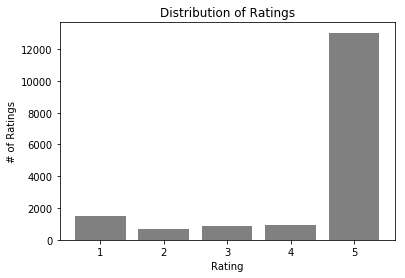

In [18]:
ratings_sorted = sorted(list(zip(reviews_df.stars.value_counts().index, reviews_df.stars.value_counts())))
plt.bar([r[0] for r in ratings_sorted], [r[1] for r in ratings_sorted], color='grey')
plt.xlabel("Rating")
plt.ylabel("# of Ratings")
plt.title("Distribution of Ratings")

In [19]:
print('Number of podcasts: ', len(reviews_df['url'].unique()))
print('Number of users: ', len(reviews_df['user'].unique()))
print("Average Number of Reviews per podcast: ", reviews_df.shape[0]/reviews_df.url.nunique())
print("Average Number of Reviews per user: ", reviews_df.shape[0]/reviews_df.user.nunique())

Number of podcasts:  360
Number of users:  16146
Average Number of Reviews per podcast:  47.18888888888889
Average Number of Reviews per user:  1.0521491391056608


In [20]:
reviews_df.user.value_counts()

Jack_McCoy               9
Captain Moderate         8
Bookshelves91            7
poolejosh1               7
pathosandpopcorn         7
schmidtyNIDAHONOHICK     7
The truest of fans       7
Elsworker                6
Ellerpea                 6
SofSof72                 5
RedDoolan                5
BlackAndAwesome1037      5
Jewelsmariee             5
KelliAlbrecht            5
ray ray mc'bigears       5
Fool'sGoldfinch          5
kingkong573.05           5
Tadhachile               5
Axiom777                 4
Hsiaohaha                4
Lcdscreen                4
J. Barshop               4
LydianalaMode            4
ArthurMc5                4
SmoulderingFrog          4
Nobstarmafu              4
hiop10                   4
MVPC84                   4
Takeoutblonde            4
rabidmoderate            4
                        ..
Lostfan57                1
MikeyND87                1
Deekomendez              1
LivelyDan                1
Haku311                  1
Tallahappy               1
K

In [21]:
# encoding the user into user_id
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
reviews_df['user_id'] = label.fit_transform(reviews_df['user'])
reviews_df['podcast_id'] = label.fit_transform(reviews_df['url'])
reviews_df

,reviews,stars,user,url,user_id,podcast_id
0,“Whilst there is a story here it doesn’t seem ...,3,whatdidiexpect,https://chartable.com/podcasts/the-shrink-next...,15843,298
1,"“I can’t stop listening... both fascinated, ye...",4,Ardentspirit,https://chartable.com/podcasts/the-shrink-next...,967,298
2,“I half expected John B McElmore to wander out...,5,emaywwew,https://chartable.com/podcasts/the-shrink-next...,12271,298
3,“This is awesome-best podcast I’ve listened to...,5,Debster2024,https://chartable.com/podcasts/the-shrink-next...,2729,298
4,“Can’t wait for more”,5,ladyogirl,https://chartable.com/podcasts/the-shrink-next...,13578,298
5,“In 26 minutes of the first episode I heard mo...,1,UnclaimedOrb932,https://chartable.com/podcasts/the-shrink-next...,10301,298
6,“Loved it! Very well done in every way. Hard ...,5,oldusedcarrs,https://chartable.com/podcasts/the-shrink-next...,14518,298
7,“So what the hell happened!?!? Left me hanging...,5,smitterbee,https://chartable.com/podcasts/the-shrink-next...,15252,298
8,“I want to listen to a podcast not ad after ad...,1,StevenGrace10,https://chartable.com/podcasts/the-shrink-next...,9522,298
9,“Super interesting. I can’t wait for the next ...,5,podster50,https://chartable.com/podcasts/the-shrink-next...,14719,298


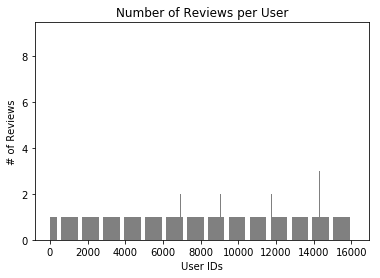

In [22]:
ratings_per_user = reviews_df.user_id.value_counts()
ratings_per_user = sorted(list(zip(ratings_per_user.index, ratings_per_user)))
plt.bar([r[0] for r in ratings_per_user], [r[1] for r in ratings_per_user], color='grey')
plt.xlabel("User IDs")
plt.ylabel("# of Reviews")
plt.title("Number of Reviews per User")
plt.show()

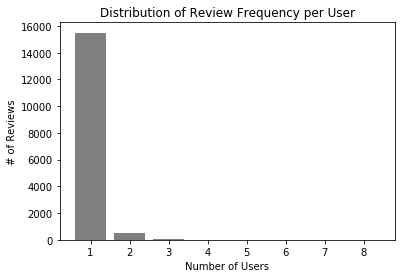

In [23]:
from collections import Counter

user_ratings = [r[1] for r in ratings_per_user]
sorted_user_ratings = sorted(Counter(user_ratings).items())
plt.bar([r[0] for r in sorted_user_ratings][:-1], [r[1] for r in sorted_user_ratings][:-1], color='grey')
plt.xlabel("Number of Users")
plt.ylabel("# of Reviews")
plt.title("Distribution of Review Frequency per User")
plt.show()

# Baseline Surprise model

In [233]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

In [234]:
# for Surprise, we only need three columns from the dataset
data = reviews_df[['user_id', 'url', 'stars']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

# train-test-split
trainset, testset = train_test_split(data, test_size=.2)

In [235]:
# instantiate SVD and fit the trainset
svd = SVD()
svd.fit(trainset)

In [236]:
predictions = svd.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.1619
MAE:  0.8094


0.809409453041439

In [237]:
# taking a look at the first 10 rows of our test set
predictions[:10]

[Prediction(uid=8799, iid='https://chartable.com/podcasts/ted-radio-hour', r_ui=5.0, est=3.8905917497101528, details={'was_impossible': False}),
 Prediction(uid=12076, iid='https://chartable.com/podcasts/caliphate', r_ui=5.0, est=4.57776666048074, details={'was_impossible': False}),
 Prediction(uid=3723, iid='https://chartable.com/podcasts/radiolab', r_ui=1.0, est=3.143596176281524, details={'was_impossible': False}),
 Prediction(uid=12120, iid='https://chartable.com/podcasts/radiolab-presents-more-perfect', r_ui=1.0, est=3.505685728145289, details={'was_impossible': False}),
 Prediction(uid=10190, iid='https://chartable.com/podcasts/happier-with-gretchen-rubin', r_ui=5.0, est=4.767431506236722, details={'was_impossible': False}),
 Prediction(uid=6344, iid='https://chartable.com/podcasts/getting-curious-with-jonathan-van-ness', r_ui=5.0, est=4.768278057846159, details={'was_impossible': False}),
 Prediction(uid=7884, iid='https://chartable.com/podcasts/ear-biscuits', r_ui=5.0, est=4.83

In [238]:
# runnign randomized search on SVD
from surprise.model_selection import RandomizedSearchCV

params = {'n_factors': [1,5,10,25,50,75,100], 'reg_all': [.005,.01,.02,.05,.1,.25,.5], 'lr_all':[.005,.01,.02,.05,.1,.25,.5],
         'n_epochs': [10,20,50]}
model = RandomizedSearchCV(SVD,param_distributions=params,n_jobs=-1,joblib_verbose=10, cv=5)
model.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   38.9s finished


In [239]:
# best params and score
print(model.best_score)
print(model.best_params)

{'rmse': 1.171109676933175, 'mae': 0.6499159327563461}
{'rmse': {'n_factors': 50, 'reg_all': 0.02, 'lr_all': 0.05, 'n_epochs': 20}, 'mae': {'n_factors': 10, 'reg_all': 0.01, 'lr_all': 0.5, 'n_epochs': 10}}


In [240]:
# now checking best params specifically on test set
better = SVD(n_factors=5,reg_all=.01,lr_all=.02,n_epochs=20)
better.fit(trainset)
better_preds = better.test(testset)
accuracy.rmse(better_preds)
accuracy.mae(better_preds)

RMSE: 1.1567
MAE:  0.7935


0.7935439382282867